In [2]:
import random
import gradio as gr
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from sklearn.metrics import f1_score,precision_score, recall_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from PIL import Image

2024-08-31 15:40:48.266624: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-31 15:40:48.272805: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-31 15:40:48.291885: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-31 15:40:48.323992: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-31 15:40:48.334193: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-31 15:40:48.370807: I tensorflow/core/platform/cpu_feature_gu

In [3]:
x_train=np.loadtxt('input.csv',delimiter=',')
y_train=np.loadtxt('labels.csv',delimiter=',')

x_test=np.loadtxt('input_test.csv',delimiter=',')
y_test=np.loadtxt('labels_test.csv',delimiter=',')

In [4]:
x_train=x_train.reshape(len(x_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)

x_test=x_test.reshape(len(x_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)

x_train=x_train/255.0
x_test=x_test/255.0

In [5]:
print("Shape of x_train: ",x_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (2000, 100, 100, 3)
Shape of y_train:  (2000, 1)
Shape of x_test:  (400, 100, 100, 3)
Shape of y_test:  (400, 1)


In [6]:
x_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

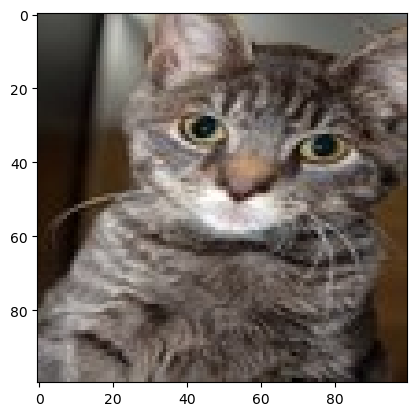

In [7]:
idx=random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

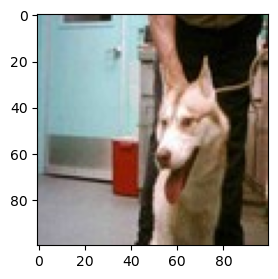

In [8]:
def display_high_resolution_image(images, index):
    img = images[index]

    plt.figure(figsize=(3, 3))  
    plt.imshow(img)
plt.show()

idx = np.random.randint(0, len(x_train))
display_high_resolution_image(x_train, idx)


In [9]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)

In [10]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

/home/rgukt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
history=model.fit(x_train,y_train,epochs=10,batch_size=64)

Epoch 1/10


2024-08-31 15:41:40.357870: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 240000000 exceeds 10% of free system memory.
2024-08-31 15:41:43.817335: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78675968 exceeds 10% of free system memory.
2024-08-31 15:41:44.512348: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78675968 exceeds 10% of free system memory.


 1/32 ━━━━━━━━━━━━━━━━━━━━ 2:03 4s/step - accuracy: 0.6094 - loss: 0.6879

2024-08-31 15:41:44.791481: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78675968 exceeds 10% of free system memory.
2024-08-31 15:41:45.243666: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78675968 exceeds 10% of free system memory.


32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 624ms/step - accuracy: 0.5033 - loss: 0.7784
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 561ms/step - accuracy: 0.5838 - loss: 0.6830
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 552ms/step - accuracy: 0.6737 - loss: 0.6152
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 560ms/step - accuracy: 0.7308 - loss: 0.5335
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 563ms/step - accuracy: 0.7504 - loss: 0.5051
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 556ms/step - accuracy: 0.7949 - loss: 0.4531
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 570ms/step - accuracy: 0.8396 - loss: 0.3834
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 565ms/step - accuracy: 0.8835 - loss: 0.3004
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 565ms/step - accuracy: 0.9059 - loss: 0.2311
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 616ms/step - accuracy: 0.9461 - loss: 0.1801


In [13]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.6925 - loss: 0.8529
Test Loss: 0.9077368974685669
Test Accuracy: 0.6650000214576721


In [14]:
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype(int)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


In [15]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.6918604651162791
Recall: 0.595
F1 Score: 0.6397849462365591


In [16]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.6925 - loss: 0.8529


[0.9077368974685669, 0.6650000214576721]

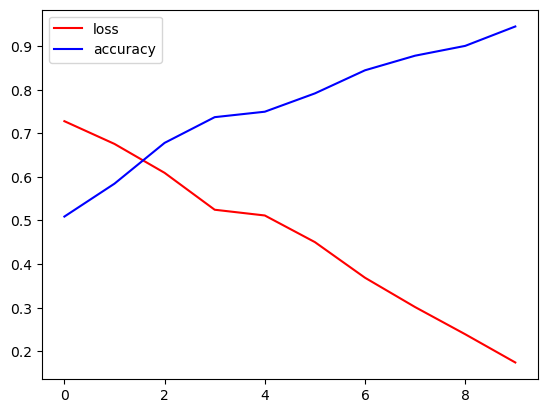

In [25]:
plt.plot(history.history['loss'],color='red',label='loss')
plt.plot(history.history['accuracy'],color='blue',label='accuracy')
plt.show()

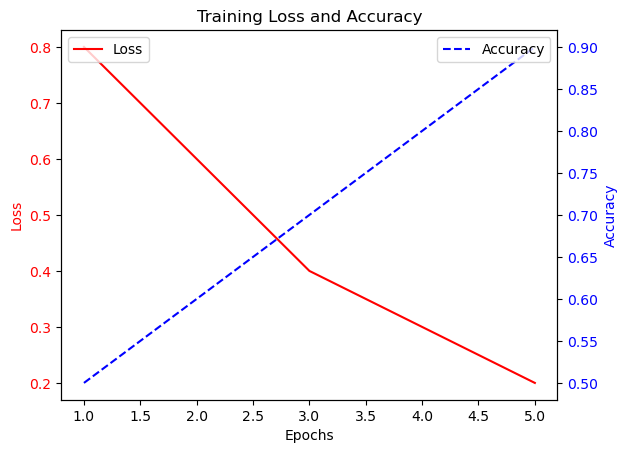

In [28]:
fig, ax1 = plt.subplots()

ax1.plot(epochs, loss, color='red', label='Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.plot(epochs, accuracy, color='blue', label='Accuracy', linestyle='--')
ax2.set_ylabel('Accuracy', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Training Loss and Accuracy')

plt.show()

In [ ]:
idx2=random.randint(0,len(x_test))
plt.imshow(x_test[idx2,:])
plt.show()

y_pred =model.predict(x_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred>0.5

if(y_pred==0):
    pred='dog'
else:
    pred='cat'
print('our model says it is a :',pred)

In [ ]:
def preprocess_image(image):
    image = image.resize((100, 100))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)
    return image

In [ ]:
def predict(image):
    image = preprocess_image(image)
    prediction = model.predict(image)
    result = (prediction > 0.5).astype(int)
    return "Cat" if result[0][0] == 1 else "Dog"

In [ ]:
interface = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil"),
    outputs=gr.Text()
)

In [ ]:
interface.launch()